In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [60]:
ages = medical_df.age
charges =medical_df.charges
smoker =medical_df.smoker
medical_df = pd.read_csv('medical.csv')

In [68]:
def estimate_charges(age,w,b):
    return w*age+b
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))
def try_params(w,b,smoker):
    if smoker=='yes':
        ages= smoker_df.age
        target = smoker_df.charges
    elif smoker=='no':
        ages=non_smoker_df.age
        target = non_smoker_df.charges
    else:
        ages = medcial_df.age
        target =medical_df.charges
    plt.title('Age vs Estimated Charge');
    
    x = estimate_charges(ages,w,b)
    plt.plot(ages,x,'r');
    plt.scatter(ages,target,s=8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Estimate', 'Actual']);
    loss = rmse(target, x)
    print("RMES Loss:", loss)

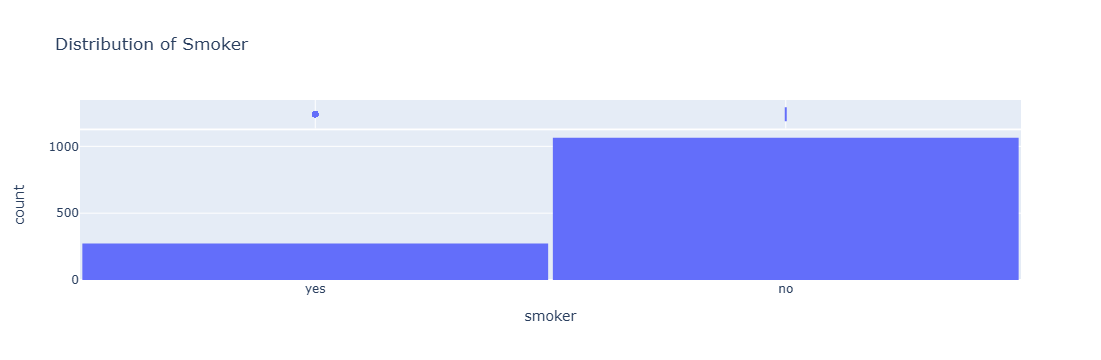

In [40]:
fig = px.histogram(medical_df,
                   x='smoker',
                   marginal='box',
                   title='Distribution of Smoker')
fig.update_layout(bargap=0.01)
fig.show()

In [82]:
print('Binary Encoding')

Binary Encoding


In [65]:
smoker_code= {'no':0 ,'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_value)



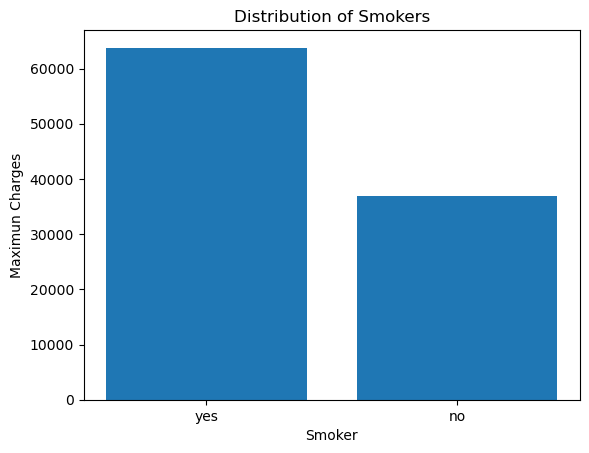

In [41]:
plt.title('Distribution of Smokers');
plt.bar(smoker,charges);
plt.xlabel('Smoker');
plt.ylabel('Maximun Charges');


In [17]:
medical_df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

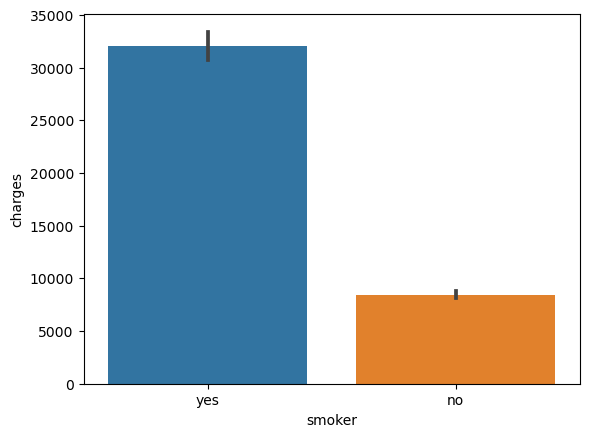

In [36]:
sns.barplot(data=medical_df, x='smoker',y='charges');

In [66]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [44]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984767

In [45]:
model=LinearRegression()

In [73]:
inputs, targets = medical_df[['age','bmi','children','smoker_code']],medical_df['charges']
model.fit(inputs,targets)
predictions= model.predict(inputs)
print(predictions)
print('Loss',rmse(targets,predictions))

[25587.42524891  3880.94594512  7158.62006921 ...  4398.7459491
  1615.83647369 36793.67069541]
Loss 6056.439217188081


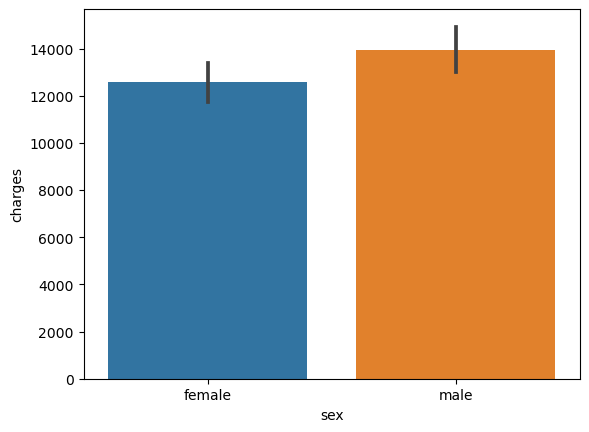

In [79]:
sns.barplot(data=medical_df,x='sex',y='charges');

In [75]:
sex_code={'female':0, 'male':1}
medical_df['sex_code'] = medical_df.sex.map(sex_code)


In [76]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [80]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025366

In [81]:
inputs, targets = medical_df[['age','bmi','children','smoker_code','sex_code']],medical_df['charges']
model.fit(inputs,targets)
predictions= model.predict(inputs)
print(predictions)
print('Loss',rmse(targets,predictions))

[25661.85689486  3818.77858262  7096.73025538 ...  4465.88909619
  1676.96948913 36863.89250792]
Loss 6056.100708754546


In [83]:
print('One Hot Encoding')

One Hot Encoding


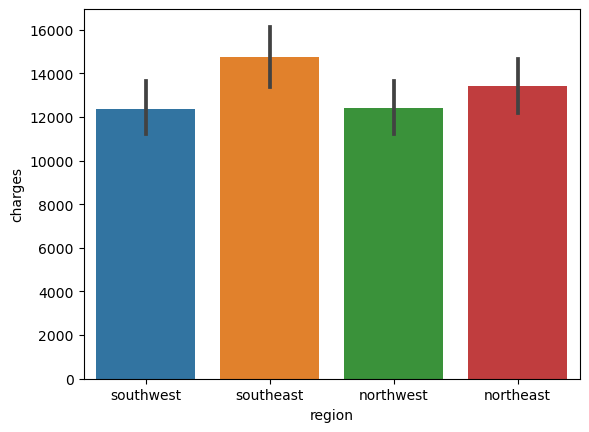

In [85]:
sns.barplot(data=medical_df,x='region',y='charges');

In [91]:
southwest_test = {'southwest':1,'southeast':0,'northwest':0,'northeast':0}
medical_df['southwest_test'] = medical_df.region.map(southwest_test)

In [92]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,southwest,southwest_test
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,1,1


In [93]:
from sklearn import preprocessing